In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import bloscpack as bp
import matplotlib.pyplot as plt
%matplotlib inline
import vtk
from vtk.util import numpy_support

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from annotation_utilities import *
from metadata import *
from vis3d_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Local Macbook Pro


In [2]:
stack = 'MD585'

In [3]:
label_to_name, name_to_label = DataManager.load_volume_label_to_name(stack=stack)

In [4]:
vol_xmin, vol_xmax, vol_ymin, vol_ymax, vol_zmin, vol_zmax = \
DataManager.load_original_volume_bbox(stack=stack, volume_type='annotation', downscale=32)

print 'annotation volume bbox :', vol_xmin, vol_xmax, vol_ymin, vol_ymax, vol_zmin, vol_zmax

annotation volume bbox : 594 1028 125 485 112 474


In [5]:
name_u_to_color = {name_u: np.array(random_colors(1)[0])/255.
                            for name_u in set([convert_to_original_name(name_s) 
                                               for name_s in name_to_label.keys()])}

# Convert integer-valued annotation volume to structure meshes

In [11]:
volume = DataManager.load_annotation_volume(stack=stack, downscale=32)

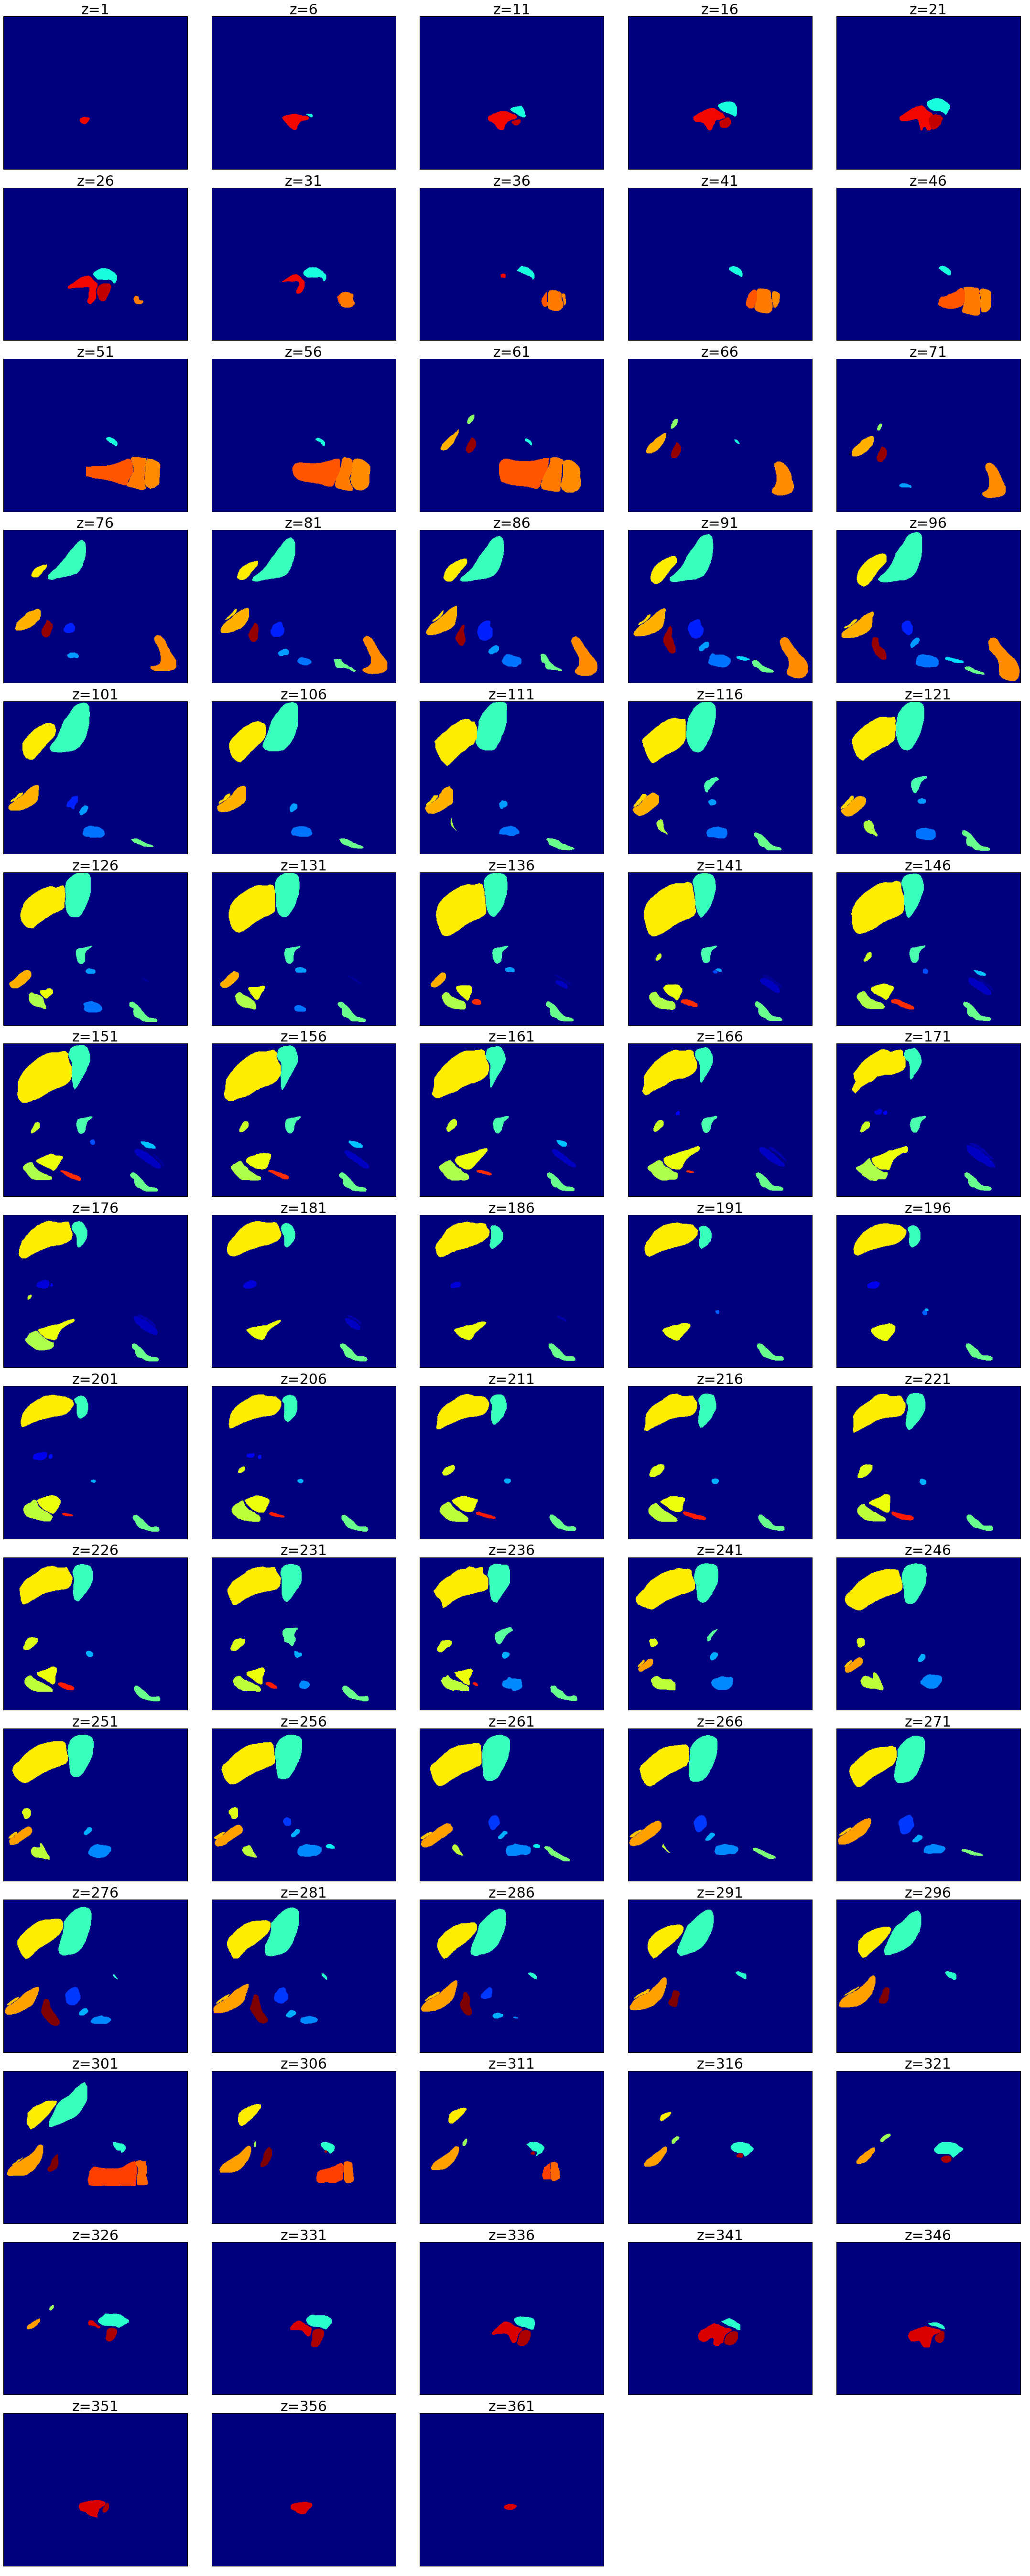

In [14]:
display_volume_sections(volume, vmin=0, vmax=volume.max())

In [7]:
for name_s, label in name_to_label.iteritems():
    
    xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(volume == label) 
    
    print name_s, xmin, xmax, ymin, ymax, zmin, zmax
    
    vol = (volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1] == label).astype(np.float)

    t = time.time()

    polydata = volume_to_polydata(vol, origin=(vol_xmin+xmin,vol_ymin+ymin,vol_zmin+zmin), 
                                  num_simplify_iter=3, smooth=True)
    # coordinates with respect to aligned uncropped volume

    sys.stderr.write('time: %.2f\n' % (time.time() - t) ) # ~ 150s for outerContour; 93s for sp5
    
    
    fp = DataManager.get_mesh_filepath(stack_m=stack, vol_type_m='annotation', structure=name_s)
    create_parent_dir_if_not_exists(fp)
    save_mesh_stl(polydata, fp)
    upload_to_s3(fp)

LRt_R 291 360 276 317 260 273
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_LRt_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_LRt_R.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2972: 0.03 seconds
simplify 1 @ 596: 0.02 seconds
simplify 2 @ 120: 0.00 seconds
time: 0.07


Sp5C_L 325 432 235 358 34 97


marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24918: 0.30 seconds
simplify 1 @ 4985: 0.21 seconds
simplify 2 @ 998: 0.04 seconds
time: 0.71


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5C_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5C_L.stl"
Pn_L 44 120 271 325 111 179


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17385: 0.15 seconds
simplify 1 @ 3478: 0.15 seconds
simplify 2 @ 697: 0.03 seconds
time: 0.40


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Pn_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Pn_L.stl"
7N_R 195 262 272 315 229 286


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_7N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_7N_R.stl"
PBG_L 94 139 124 172 57 74
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_PBG_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_PBG_L.stl"


simplify 0 @ 11221: 0.10 seconds
simplify 1 @ 2245: 0.08 seconds
simplify 2 @ 450: 0.02 seconds
time: 0.25
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2018: 0.02 seconds
simplify 1 @ 405: 0.01 seconds
simplify 2 @ 82: 0.00 seconds
time: 0.05


VLL_L 81 140 178 308 57 97


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8960: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VLL_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VLL_L.stl"
VLL_R 88 146 174 302 273 308


simplify 1 @ 1793: 0.07 seconds
simplify 2 @ 360: 0.02 seconds
time: 0.26
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9424: 0.12 seconds
simplify 1 @ 1886: 0.07 seconds
simplify 2 @ 378: 0.02 seconds
time: 0.27


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VLL_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VLL_R.stl"
7N_L 185 242 291 332 77 134


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_7N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_7N_L.stl"
PBG_R 98 129 147 182 305 327
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_PBG_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_PBG_R.stl"


simplify 0 @ 11282: 0.10 seconds
simplify 1 @ 2258: 0.09 seconds
simplify 2 @ 453: 0.02 seconds
time: 0.25
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2055: 0.02 seconds
simplify 1 @ 412: 0.01 seconds
simplify 2 @ 84: 0.00 seconds
time: 0.04


RtTg 74 173 240 304 126 240


marching cube: 0.10 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 29052: 0.26 seconds
simplify 1 @ 5812: 0.27 seconds
simplify 2 @ 1164: 0.06 seconds
time: 0.75


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_RtTg.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_RtTg.stl"
Pn_R 46 117 265 321 199 266


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Pn_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Pn_R.stl"
LRt_L 280 371 289 354 78 240


simplify 0 @ 16531: 0.20 seconds
simplify 1 @ 3307: 0.15 seconds
simplify 2 @ 663: 0.03 seconds
time: 0.45
marching cube: 0.16 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 30460: 0.39 seconds
simplify 1 @ 6093: 0.27 seconds
simplify 2 @ 1220: 0.05 seconds
time: 0.93


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_LRt_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_LRt_L.stl"
Sp5O_R 199 315 213 272 301 315


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5O_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5O_R.stl"
SNR_L 10 91 167 274 58 138


simplify 0 @ 4492: 0.16 seconds
simplify 1 @ 900: 0.03 seconds
simplify 2 @ 181: 0.01 seconds
time: 0.23
marching cube: 0.10 seconds
mesh_to_polydata: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SNR_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SNR_L.stl"
12N 305 373 239 296 134 184


simplify 0 @ 25018: 0.22 seconds
simplify 1 @ 5005: 0.22 seconds
simplify 2 @ 1002: 0.04 seconds
time: 0.63
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12804: 0.10 seconds
simplify 1 @ 2562: 0.09 seconds
simplify 2 @ 514: 0.02 seconds
time: 0.26


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_12N.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_12N.stl"
SNR_R 2 93 174 281 240 328


marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 30066: 0.23 seconds
simplify 1 @ 6014: 0.27 seconds
simplify 2 @ 1204: 0.05 seconds
time: 0.71


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SNR_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SNR_R.stl"
Sp5O_L 184 307 229 309 31 63


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12728: 0.32 seconds
simplify 1 @ 2547: 0.11 seconds
simplify 2 @ 511: 0.02 seconds
time: 0.53


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5O_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5O_L.stl"
RMC_L 56 89 175 213 137 176
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_RMC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_RMC_L.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4637: 0.04 seconds
simplify 1 @ 929: 0.03 seconds
simplify 2 @ 187: 0.01 seconds
time: 0.09


DC_R 205 301 168 209 274 347


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_DC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_DC_R.stl"
VCA_L 148 232 203 280 0 36


simplify 0 @ 13311: 0.12 seconds
simplify 1 @ 2663: 0.10 seconds
simplify 2 @ 534: 0.02 seconds
time: 0.31
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VCA_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VCA_L.stl"
3N_L 71 110 154 176 171 187
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_3N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_3N_L.stl"


simplify 0 @ 13016: 0.13 seconds
simplify 1 @ 2604: 0.10 seconds
simplify 2 @ 522: 0.02 seconds
time: 0.30
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2041: 0.02 seconds
simplify 1 @ 409: 0.01 seconds
simplify 2 @ 83: 0.00 seconds
time: 0.05


6N_R 201 216 225 239 188 199
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_6N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_6N_R.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 590: 0.01 seconds
simplify 1 @ 119: 0.00 seconds
time: 0.01


Sp5I_L 283 346 231 314 25 63


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5I_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5I_L.stl"
RMC_R 36 86 184 224 203 260
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_RMC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_RMC_R.stl"

simplify 0 @ 11579: 0.16 seconds
simplify 1 @ 2317: 0.10 seconds
simplify 2 @ 465: 0.02 seconds
time: 0.34
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8040: 0.07 seconds
simplify 1 @ 1609: 0.06 seconds
simplify 2 @ 323: 0.01 seconds
time: 0.19



5N_L 135 182 210 262 72 101
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_5N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_5N_L.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6263: 0.07 seconds
simplify 1 @ 1254: 0.04 seconds
simplify 2 @ 252: 0.01 seconds
time: 0.15


SNC_L 7 63 183 259 78 125
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SNC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SNC_L.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7298: 0.05 seconds
simplify 1 @ 1461: 0.05 seconds
simplify 2 @ 293: 0.01 seconds
time: 0.17


SNC_R 0 57 199 262 240 305
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SNC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SNC_R.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8511: 0.06 seconds
simplify 1 @ 1703: 0.06 seconds
simplify 2 @ 342: 0.01 seconds
time: 0.19


AP 320 361 227 249 144 164
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_AP.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_AP.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2449: 0.02 seconds
simplify 1 @ 491: 0.02 seconds
simplify 2 @ 99: 0.00 seconds
time: 0.05


5N_R 144 189 204 251 255 286
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_5N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_5N_R.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6357: 0.06 seconds
simplify 1 @ 1273: 0.04 seconds
simplify 2 @ 256: 0.01 seconds
time: 0.14


Sp5I_R 308 340 211 270 301 315
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5I_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Sp5I_R.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3125: 0.05 seconds
simplify 1 @ 626: 0.02 seconds
simplify 2 @ 126: 0.01 seconds
time: 0.09


3N_R 67 104 156 177 193 207
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_3N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_3N_R.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1818: 0.02 seconds
simplify 1 @ 365: 0.01 seconds
simplify 2 @ 74: 0.00 seconds
time: 0.05


6N_L 199 216 227 239 140 154
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_6N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_6N_L.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 828: 0.01 seconds
simplify 1 @ 167: 0.01 seconds
time: 0.02


IC 93 213 0 135 72 301


marching cube: 0.52 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 89328: 0.99 seconds
simplify 1 @ 17867: 1.03 seconds
simplify 2 @ 3575: 0.20 seconds
time: 2.87


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_IC.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_IC.stl"
VCA_R 164 251 185 251 323 362


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VCA_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VCA_R.stl"
DC_L 209 270 185 241 5 70


simplify 0 @ 12128: 0.12 seconds
simplify 1 @ 2427: 0.09 seconds
simplify 2 @ 487: 0.02 seconds
time: 0.29
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_DC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_DC_L.stl"
Amb_R 267 298 272 288 252 262
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Amb_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Amb_R.stl"


simplify 0 @ 11434: 0.09 seconds
simplify 1 @ 2288: 0.08 seconds
simplify 2 @ 459: 0.02 seconds
time: 0.24
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 935: 0.01 seconds
simplify 1 @ 188: 0.01 seconds
time: 0.02


VCP_R 226 273 186 252 304 354
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VCP_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VCP_R.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6712: 0.06 seconds
simplify 1 @ 1344: 0.05 seconds
simplify 2 @ 270: 0.01 seconds
time: 0.15


LC_R 167 219 166 210 231 241
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_LC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_LC_R.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2634: 0.04 seconds
simplify 1 @ 528: 0.02 seconds
simplify 2 @ 107: 0.00 seconds
time: 0.08


10N_R 314 379 234 283 163 188
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_10N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_10N_R.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 4330: 0.03 seconds
simplify 1 @ 867: 0.03 seconds
simplify 2 @ 175: 0.01 seconds
time: 0.09


7n_R 168 218 218 281 194 290


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8538: 0.07 seconds
simplify 1 @ 1709: 0.06 seconds
simplify 2 @ 343: 0.01 seconds
time: 0.20


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_7n_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_7n_R.stl"
4N_R 106 117 160 174 197 209
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_4N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_4N_R.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 609: 0.01 seconds
simplify 1 @ 123: 0.00 seconds
time: 0.01


Tz_L 118 184 298 324 133 167
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Tz_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Tz_L.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5165: 0.05 seconds
simplify 1 @ 1034: 0.03 seconds
simplify 2 @ 208: 0.01 seconds
time: 0.11


Tz_R 125 187 295 319 198 236
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Tz_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Tz_R.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5167: 0.05 seconds
simplify 1 @ 1035: 0.04 seconds
simplify 2 @ 208: 0.01 seconds
time: 0.11


7n_L 146 226 223 306 69 144


marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8575: 0.07 seconds
simplify 1 @ 1716: 0.06 seconds
simplify 2 @ 344: 0.01 seconds
time: 0.23


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_7n_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_7n_L.stl"
4N_L 111 122 159 171 164 176
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_4N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_4N_L.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 548: 0.01 seconds
simplify 1 @ 111: 0.00 seconds
time: 0.01


LC_L 171 218 171 219 114 172


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7909: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_LC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_LC_L.stl"
10N_L 312 385 237 296 125 154
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_10N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_10N_L.stl"


simplify 1 @ 1583: 0.06 seconds
simplify 2 @ 318: 0.01 seconds
time: 0.22
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4779: 0.03 seconds
simplify 1 @ 957: 0.03 seconds
simplify 2 @ 193: 0.01 seconds
time: 0.10


SC 17 167 14 155 72 319


marching cube: 0.68 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 129806: 1.16 seconds
simplify 1 @ 25962: 1.55 seconds
simplify 2 @ 5194: 0.31 seconds
time: 3.88


aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SC.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_SC.stl"
VCP_L 214 258 217 278 9 29
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VCP_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_VCP_L.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3830: 0.07 seconds
simplify 1 @ 767: 0.03 seconds
simplify 2 @ 155: 0.01 seconds
time: 0.12


Amb_L 255 301 297 315 89 97
aws s3 cp "/home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Amb_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD585/MD585_down32_annotationVolume/MD585_down32_annotationVolume_Amb_L.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1236: 0.01 seconds
simplify 1 @ 248: 0.01 seconds
simplify 2 @ 51: 0.00 seconds
time: 0.03


# Load 

In [8]:
meshes = DataManager.load_meshes(stack_m=stack, vol_type_m='annotationAsScore', sided=True)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_Sp5C_R.stl
Error loading mesh for Sp5C_R: Mesh is empty: Sp5C_R..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_sp5.stl
Error loading mesh for sp5: Mesh is empty: sp5..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_outerContour.stl
Error loading mesh for outerContour: Mesh is empty: outerContour..


In [9]:
mesh_actors = [actor_mesh(mesh, name_u_to_color[convert_to_original_name(name_s)], wireframe=True, opacity=.5) 
               for name_s, mesh in meshes.iteritems()]

In [10]:
launch_vtk(mesh_actors, init_angle='30', background_color=(0,0,0))

In [ ]:
fn = os.path.join(MESH_ROOTDIR, stack, "%(stack)s_down32_outerContourVolume_smoothed.stl" % {'stack': stack})
outerContour_polydata = load_mesh_stl(fn, return_polydata_only=True)

outerContour_actor = actor_mesh(outerContour_polydata, (1,1,1), opacity=.1, wireframe=False)

In [32]:
launch_vtk(mesh_actors + [outerContour_actor], init_angle='30', background_color=(0,0,0))

NameError: name 'outerContour_actor' is not defined

In [ ]:
# Export to rgb PLY file (STL file can not have color info)
# https://github.com/Kitware/VTK/blob/master/IO/PLY/Testing/Python/TestPLYReadWrite.py#L31
# http://www.vtk.org/doc/nightly/html/classvtkPLYWriter.html#aa7f0bdbb2decdc7a7360a890a6c10e8b

for name_s, polydata in polydata_list.iteritems():
    fn = os.path.join(mesh_rootdir, stack, "%(stack)s_down32_%(name)s_smoothed.ply" % {'stack': stack, 'name':name_s})
    save_mesh(polydata, fn, color=(colors[convert_name_to_unsided(name_s)]*255).astype(np.int))